In [82]:
import os
# from os import path

# Module for reading CSV files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

All_accident = '/users/juanmarin/desktop/Resources/US_Accidents_Dec21_updated.csv'
All_accident_data = pd.read_csv(All_accident)

All_accident_data.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [83]:
All_accident_data['year'] = All_accident_data["Start_Time"].str[:4]
All_accident_data.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2016
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,2016
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,2016
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2016


In [102]:
AccidentData_2020 = All_accident_data.loc[All_accident_data['year']== "2021"]
AccidentData_2020.count()


ID                       1511745
Severity                 1511745
Start_Time               1511745
End_Time                 1511745
Start_Lat                1511745
Start_Lng                1511745
End_Lat                  1511745
End_Lng                  1511745
Distance(mi)             1511745
Description              1511745
Number                    707038
Street                   1511743
Side                     1511745
City                     1511684
County                   1511745
State                    1511745
Zipcode                  1511230
Country                  1511745
Timezone                 1510157
Airport_Code             1505849
Weather_Timestamp        1486395
Temperature(F)           1479262
Wind_Chill(F)            1469327
Humidity(%)              1477481
Pressure(in)             1483543
Visibility(mi)           1479284
Wind_Direction           1473371
Wind_Speed(mph)          1473375
Precipitation(in)        1447075
Weather_Condition        1479142
Amenity   

In [103]:
AccidentData_2020 = AccidentData_2020.drop(columns=["Astronomical_Twilight","Nautical_Twilight", "Civil_Twilight", \
                                           "Turning_Loop", "Traffic_Signal", "Traffic_Calming",\
                                           "Stop", "Station", "Roundabout", "Railway", "Amenity",\
                                           "No_Exit", "Junction", "Give_Way", "Crossing", "Bump", \
                                           "Pressure(in)", "Wind_Direction", "Airport_Code", "Timezone",\
                                           "Description"])
AccidentData_2020.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,year
224945,A-224946,2,2021-03-10 19:57:00,2021-03-11 05:28:02,42.382359,-71.022318,42.383346,-71.021204,0.089,NaN,...,2021-03-10 19:54:00,42.0,36.0,60.0,10.0,12.0,0.0,Fair,Night,2021
224946,A-224947,2,2021-07-30 23:37:00,2021-07-31 03:22:58,40.908676,-123.707116,40.904856,-123.740056,1.740,35679.0,...,2021-07-30 23:50:00,54.0,54.0,100.0,2.0,6.0,0.0,Fog,Night,2021
224947,A-224948,2,2021-10-15 16:42:36,2021-10-15 17:02:36,38.970628,-77.116333,38.973149,-77.121876,0.345,NaN,...,2021-10-15 16:52:00,79.0,79.0,62.0,10.0,9.0,0.0,Mostly Cloudy,Day,2021
224948,A-224949,2,2021-12-21 11:42:00,2021-12-21 12:21:00,47.642651,-122.318590,47.643411,-122.308460,0.474,NaN,...,2021-12-21 11:53:00,38.0,38.0,86.0,10.0,0.0,0.0,Cloudy,Day,2021
224949,A-224950,2,2021-12-09 08:51:00,2021-12-09 11:01:22,37.419536,-122.090640,37.410966,-122.076087,0.994,NaN,...,2021-12-09 08:55:00,52.0,52.0,71.0,10.0,9.0,0.0,Fair,Day,2021


In [104]:
AccidentData_2020['month'] = AccidentData_2020["Start_Time"].str[5:7]

AccidentData_2020['month']=AccidentData_2020['month'].astype("int")
AccidentData_2020.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,year,month
224945,A-224946,2,2021-03-10 19:57:00,2021-03-11 05:28:02,42.382359,-71.022318,42.383346,-71.021204,0.089,NaN,...,42.0,36.0,60.0,10.0,12.0,0.0,Fair,Night,2021,3
224946,A-224947,2,2021-07-30 23:37:00,2021-07-31 03:22:58,40.908676,-123.707116,40.904856,-123.740056,1.740,35679.0,...,54.0,54.0,100.0,2.0,6.0,0.0,Fog,Night,2021,7
224947,A-224948,2,2021-10-15 16:42:36,2021-10-15 17:02:36,38.970628,-77.116333,38.973149,-77.121876,0.345,NaN,...,79.0,79.0,62.0,10.0,9.0,0.0,Mostly Cloudy,Day,2021,10
224948,A-224949,2,2021-12-21 11:42:00,2021-12-21 12:21:00,47.642651,-122.318590,47.643411,-122.308460,0.474,NaN,...,38.0,38.0,86.0,10.0,0.0,0.0,Cloudy,Day,2021,12
224949,A-224950,2,2021-12-09 08:51:00,2021-12-09 11:01:22,37.419536,-122.090640,37.410966,-122.076087,0.994,NaN,...,52.0,52.0,71.0,10.0,9.0,0.0,Fair,Day,2021,12


In [105]:
accident_count = AccidentData_2020.groupby(["month"]).count()[["ID"]]
accident_count.rename(columns={'ID':'Accidents'},inplace=True)
accident_count



,Accidents
month,
1,111858
2,114451
3,65639
4,70899
5,78290
6,117502
7,107345
8,117710
9,132475


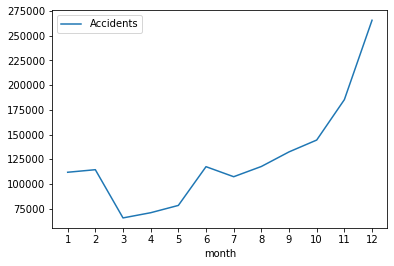

In [106]:
accident_count.plot.line()
accident_count.rename(columns={'ID':'Accidents'},inplace=True)
plt.xticks(accident_count.index)
#plt.minorticks_on()
plt.show()

In [107]:
Christmas = AccidentData_2020[(AccidentData_2020["Start_Time"].str[5:10] == "12-24")]
New_Years = AccidentData_2020[(AccidentData_2020["Start_Time"].str[5:10] == "01-01")]
Thanksgiving = AccidentData_2020[(AccidentData_2020["Start_Time"].str[5:10] == "11-25")]
Fourth_of_July= AccidentData_2020[(AccidentData_2020["Start_Time"].str[5:10] == "07-04")]
Halloween=AccidentData_2020[(AccidentData_2020["Start_Time"].str[5:10] == "10-31")]
St_Patrick=AccidentData_2020[(AccidentData_2020["Start_Time"].str[5:10] == "03-17")]



In [108]:

Christmas_count = Christmas.count()[["ID"]]
New_years_count = New_Years.count()[["ID"]]
Thanksgiving_count = Thanksgiving.count()[["ID"]]
Fourth_of_July_count = Fourth_of_July.count()[["ID"]]
Halloween_count = Halloween.count()[["ID"]]
St_patrick_count = St_Patrick.count()[["ID"]]



Christmas_count


ID    7557
dtype: int64

In [113]:
Holiday_accidents = pd.DataFrame({"Christmas": Christmas_count,
                                    "New Years": New_years_count, 
                                    "Thanksgiving": Thanksgiving_count,
                                    "Fourth of July": Fourth_of_July_count,
                                     "Halloween": Halloween_count,
                                     "St Patty": St_patrick_count}) 
 
Holiday_accidents_transpose= Holiday_accidents.transpose()
Holiday_accidents_transpose.rename(columns={'ID':'Accidents'},inplace=True)

Holiday_accidents_transpose.head()

,Accidents
Christmas,7557
New Years,3524
Thanksgiving,2682
Fourth of July,2936
Halloween,2188


<AxesSubplot:>

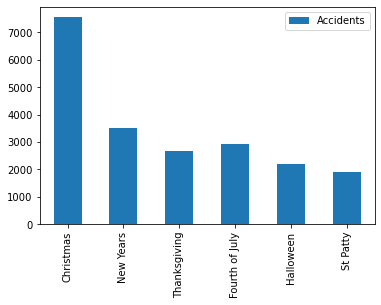

In [114]:
Holiday_accidents_transpose.plot.bar()

